In [1]:
#
# Read in api key for (newsapi-python) newsapi.org and set global variable
# #--> pip install newsapi-python
#

import requests
import json
from contextlib import closing

# get API key for newsapi.org
APIKEY_FILE = '../newsapi_key.txt'

def read_api_key(api_key_fname):
    """
        read in api key from file. relative path, file just contains api key. return key as string
    """
    with open(api_key_fname) as f:
        api_key = f.read()
    
    return api_key

api_key = read_api_key(APIKEY_FILE)

In [2]:
# Initilize NewsApiClient using api key
# using python package newsapi-python
#--> pip install newsapi-python
from newsapi import NewsApiClient

# Init
newsapi = NewsApiClient(api_key=api_key)

In [3]:
# Available sources
# get sources from NewsApiClient/newsapi.org
sources_response = newsapi.get_sources()
assert sources_response['status'] == 'ok'

# create a name:id python dictonary / map. The ids can be used for requests to NewsApiClient
name_id_dict = {s['name']:s['id'] for s in sources_response['sources']}
# creat a id:name dictonary
id_name_dict = {v: k for k, v in name_id_dict.items()}

# create a pandas dataframe from this dictonary with id as first column
import pandas as pd

id_name_df = pd.DataFrame.from_dict(data=id_name_dict, orient='index', columns=['name'])
id_name_df.index.name = 'id'
id_name_df

,name
id,
abc-news,ABC News
abc-news-au,ABC News (AU)
aftenposten,Aftenposten
al-jazeera-english,Al Jazeera English
ansa,ANSA.it
argaam,Argaam
ars-technica,Ars Technica
ary-news,Ary News
associated-press,Associated Press


In [4]:
"""
Article Scraper from a given url

requirements: 
	-Newspaper3k, https://github.com/codelucas/newspaper, http://newspaper.readthedocs.io/en/latest/, https://newsapi.org/docs/client-libraries/python
    --> pip install newspaper3k
Notes: 	
	newspaper offers nlp summary
	article.nlp()
	print(article.summary)

"""
# external
from newspaper import Article

def get_full_article(url):
    # does not work for video news sources etc
    article = Article(url)
    article.download()
    article.parse()
    text = article.text
    if len(text) < 10:
        print("warning with article url when extracting full text. Function: get_full_article")
        return None
    return text

# testing
test_article_url = "http://www.foxnews.com/world/2018/08/28/likely-lula-replacement-denies-corruption-charges-in-brazil.html"
print(get_full_article(test_article_url))

next

prev

The man in line to replace jailed presidential candidate Luiz Inacio Lula da Silva as the Brazilian Workers' Party standard-bearer on Tuesday denied accusations of corruption.

Prosecutors accuse Fernando Haddad of receiving indirect payments to his 2012 campaign for Sao Paulo mayor.

Construction company UTC Engenharia got preferential treatment on bids after covering about US$1.6 million of debt associated with Haddad's campaign, according to a former accusation filed Monday. Although Haddad did not request payment directly, he had full control over the scheme, according to prosecutors.

On Tuesday, Haddad responded while campaigning in Rio de Janeiro. He said that he cancelled a multimillion dollar project with a company belonging to the UTC group after an employee alerted him that the company was overcharging the government.

"How is it that a mayor who cancels a corrupt construction project gets put through this instead of being thanked for saving the city tens of mill

In [5]:
# get list of article objects from response from newsapi.org
#--> pip install newsapi-python
#from newsapi import NewsApiClient
#-Newspaper3k, https://github.com/codelucas/newspaper, http://newspaper.readthedocs.io/en/latest/, https://newsapi.org/docs/client-libraries/python
#--> pip install newspaper3k

def get_list_of_article_objects(newsapi_article_response, include_full_articles=True):
    """ given a article response from NewsApiClient return a list of article objects including the source id, title description url and if requested the full text of the article"""
    
    # get array of article json objects/list
    articles = newsapi_article_response['articles']
    
    # for article in articles look at 'source', 'title', 'description', 'url'
    # extract article sources titles descriptions and links to urls of actual articles
    article_objects = []
    for a in articles:
        
        article_object = {
            'news_source_id' : a['source']['id'], # article news source id
            'title' : a['title'], # article title 
            'description' : a['description'], # breif article description
            'url' : a['url'], # full article url
        }
        
        if include_full_articles:
            article_object['text'] = get_full_article(a['url']) # get full article text using Newspaper3k -- often None
        
        if None not in article_object.values():
            article_objects.append(article_object)
        
    return article_objects

In [6]:
# or by using python package
# -- https://github.com/mattlisiv/newsapi-python
#--> pip install newsapi-python
#from newsapi import NewsApiClient

def get_all_articles(source_id, api_key, max_articles=500, include_full_article_text=True):
    
    # init
    newsapi = NewsApiClient(api_key=api_key)
    
    print(source_id)
    
    all_article_objects = []
    page_number = 1
    
    while len(all_article_objects) < max_articles:
        page_number = page_number + 1
        response = newsapi.get_everything(sources=source_id,
                                      language='en',
                                      page=page_number, # can also use dates
                                        page_size=100) # 100 is maximum page size
    
        assert response['status'] == 'ok'
        
        all_article_objects += get_list_of_article_objects(response, include_full_articles=include_full_article_text)
        print("number of articles collected: %s" % len(all_article_objects[:max_articles]))
        
    return all_article_objects[:max_articles]
        
#
# Testing
#

# source
#selected_source_id = name_id_dict['Fox News']
    
# number of documents
#num_documents = 50

# example -- set include full article text to True for scrapping the actual site
#all_article_objects = get_all_articles(selected_source_id, api_key, max_articles=num_documents, include_full_article_text=False)


In [7]:
# turn list of article objects into single giant corpus

def article_objects_to_single_document_strings(article_objects):
    """combines title, description and text of all articles into single string"""
    
    concatinated_article_objects = []
    for ao in article_objects:
        article_string = ' '
        title = ao['title']
        description = ao['description']
        text = ''
        if 'text' in ao:
            text = ao['text']
            if text == None:
                text = ''
                
        article_string += title + '. ' + description + '. ' + text + '. '
        concatinated_article_object = {
            'id' : ao['news_source_id'],
            'article_string' : article_string
        }
        concatinated_article_objects.append(concatinated_article_object)
    
    return concatinated_article_objects
        
#
# Testing
#

# source
#selected_source_id = name_id_dict['Fox News']
    
# number of documents
#num_documents = 50

# example -- set include full article text to True for scrapping the actual site
#all_article_objects = get_all_articles(selected_source_id, api_key, max_articles=num_documents, include_full_article_text=True)

#simple_article_objects = article_objects_to_single_document_strings(all_article_objects)
#simple_article_objects

In [8]:
#
# Selected sources and bias labels (conservative, nuetral, liberal)
# 
# Selected sources 'Breitbart News', 'Fox News', 'Reuters', 'MSNBC', and 'CNN' - (conservative, conservative, neutral, liberal, liberal)
#
selected_source_ids = ['cnn', 'msnbc', 'reuters', 'fox-news', 'breitbart-news']

# bias labels python dictonary
id_bias_dict = {
    'cnn' : 'liberal',
    'msnbc' : 'liberal',
    'reuters' : 'neutral',
    'fox-news' : 'conservative',
    'breitbart-news' : 'conservative'
}

id_bias_dict

# pandas data frame version
id_bias_df = pd.DataFrame.from_dict(data=id_bias_dict, orient='index', columns=['bias'])
id_bias_df.index.name = 'id'
id_bias_df

# join name id dataframe and bias id dataframe
selected_news_sources_df = pd.merge(id_name_df, id_bias_df, on='id')
selected_news_sources_df

,name,bias
id,,
breitbart-news,Breitbart News,conservative
cnn,CNN,liberal
fox-news,Fox News,conservative
msnbc,MSNBC,liberal
reuters,Reuters,neutral


In [88]:
#
# scrape from selected sources
#
from sklearn.feature_extraction.text import CountVectorizer


# sources
selected_source_ids = list(selected_news_sources_df.index.values)
    
# number of documents
num_documents_per_source = 2000

def scrape_from_sources_bag_of_words(api_key, selected_source_ids, num_documents_per_source):
    
 
    frames = []
   
    for sid in selected_source_ids:
        
        #set include full article text to True for scrapping the actual site
        all_article_objects = get_all_articles(sid, api_key, max_articles=num_documents_per_source, include_full_article_text=False)

        simple_article_objects = article_objects_to_single_document_strings(all_article_objects)
        source_articles = [x['article_string'] for x in simple_article_objects]

        #count_vect = CountVectorizer()
        #bag_words = count_vect.fit_transform(source_articles)
        count_vect = CountVectorizer(input=source_articles, stop_words='english', lowercase=True, max_df=0.4,min_df=0.001)
        count_vect.fit_transform(source_articles)
        
        
        vocab_dict = {'term':list(count_vect.vocabulary_.keys()), 'frequency': list(count_vect.vocabulary_.values())}
        vocab_df = pd.DataFrame.from_dict(vocab_dict)

        vocab_df['id'] = sid
        
        
        frames.append(vocab_df)
    
    #source_id_vocab_df = pd.concat(frames)
    source_id_vocab_df = pd.concat(frames, ignore_index=True)
    
    
    return source_id_vocab_df
    

# scrape from all selected sources and store as term frequency id in panda dataframe
sources_bag_of_words_df = scrape_from_sources_bag_of_words(api_key, selected_source_ids, num_documents_per_source)

sources_bag_of_words_df

breitbart-news
number of articles collected: 100
number of articles collected: 200
number of articles collected: 300
number of articles collected: 400
number of articles collected: 500
number of articles collected: 600
number of articles collected: 700
number of articles collected: 800
number of articles collected: 900
number of articles collected: 1000
number of articles collected: 1100
number of articles collected: 1200
number of articles collected: 1300
number of articles collected: 1400
number of articles collected: 1500
number of articles collected: 1600
number of articles collected: 1700
number of articles collected: 1800
number of articles collected: 1900
number of articles collected: 2000
cnn
number of articles collected: 98
number of articles collected: 196
number of articles collected: 296
number of articles collected: 394
number of articles collected: 494
number of articles collected: 593
number of articles collected: 691
number of articles collected: 791
number of articles 

,term,frequency,id
0,texas,4394,breitbart-news
1,federal,1718,breitbart-news
2,judge,2401,breitbart-news
3,rules,3807,breitbart-news
4,daca,1168,breitbart-news
5,illegal,2179,breitbart-news
6,end,1529,breitbart-news
7,appeal,298,breitbart-news
8,ruled,3806,breitbart-news
9,friday,1843,breitbart-news


In [89]:
# print out n most common words by source
n = 10
df_grouped = sources_bag_of_words_df.groupby(by='id')
for sid,grp in df_grouped:

    top_words = grp.sort_values(by='frequency')[-n:]
    print('\nTop %s words in %s source.' % (n, sid))
    print(top_words)


Top 10 words in breitbart-news source.
            term  frequency              id
1159       young       4862  breitbart-news
655        youth       4863  breitbart-news
3801      youths       4864  breitbart-news
3072     youtube       4865  breitbart-news
3674        zero       4866  breitbart-news
4406      zeroes       4867  breitbart-news
3344        zone       4868  breitbart-news
2965       zones       4869  breitbart-news
1762      zucker       4870  breitbart-news
2075  zuckerberg       4871  breitbart-news

Top 10 words in cnn source.
          term  frequency   id
7012     young       4503  cnn
6461   younger       4504  cnn
5222     youth       4505  cnn
8195   youtube       4506  cnn
7621   zaghari       4507  cnn
8791   zakaria       4508  cnn
7037   zealand       4509  cnn
6690      zero       4510  cnn
8478  zimbabwe       4511  cnn
7728      zone       4512  cnn

Top 10 words in fox-news source.
           term  frequency        id
11619     youth       4623  fox-new

In [90]:
# get occurences of term from each source, if source does not appear it is 0
query = 'alien'
query_info_df = sources_bag_of_words_df.loc[sources_bag_of_words_df['term'] == query]
query_info_df = query_info_df.set_index('id')
query_info_df

,term,frequency
id,,
breitbart-news,alien,222
fox-news,alien,225


<Figure size 1008x720 with 0 Axes>

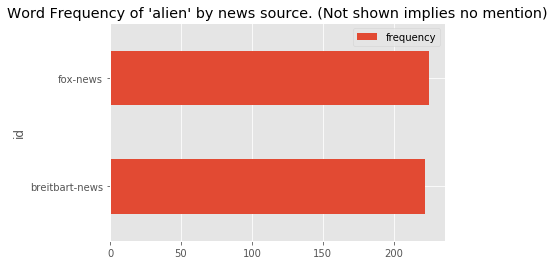

In [94]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings

plt.style.use('ggplot')

fig = plt.figure(figsize=(14,10))


query_info_df[['frequency']]
query_info_df[['frequency']].plot(kind='barh')

plt.title('Word Frequency of \'%s\' by news source. (Not shown implies no mention)' % query)

plt.show()
